# Medidas

+ m1: silent
+ m2: Intergenic Regions
+ m3: Introns
+ m4: neutral&low FI
+ m5: suma silent, intergenic e intrones

Graficar:
- m1 vs m2 (Silent Mutations vs. Intergenic Regions)
- m1 vs m3 (Silent mutations vs. Introns)
- m2 vs m3 (Intergenic Regions vs. Introns)
- m5 vs Total

Graficar x 100:
- m1 vs m4
- m2 vs m4
- m3 vs m4


In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline 

In [194]:
maf = 'maf_OrdenadoxPaciente.txt'
data = pd.read_csv(maf, sep='\t')

In [195]:
data = data.fillna('-')
print('.')

.


In [196]:
dg = data.groupby('patient')

In [217]:
m = {'patient':0, 'mut tot':0, 'silent':0, 'igr':0, 'intron':0, 'low&neutral FI':0}
Paciente = []
mut_tot = []
silent_mut = []
intergenic = []
intron_mut = []
suma_s_igr_int = []
lynfi = []

#index=[0]
for (patient, Pgroup) in dg:
    #print('\n', patient, '\n')
    #s.append(patient)
    #s.append(Pgroup.shape[0])
    m['patient'] = patient
    m['mut tot'] = Pgroup.shape[0]
    #print('mut tot:',Pgroup.shape[0])
    vgg = Pgroup.groupby('Variant_Classification')
    fig = Pgroup.groupby('MA_Func_Impact')
    for (Variant_Classification, Vgroup) in vgg:
        if Variant_Classification == 'Silent':
            m['silent'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
        if Variant_Classification == 'IGR':
            m['igr'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
        if Variant_Classification =='Intron':
            m['intron'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
            #print(Variant_Classification, ':', Vgroup.shape[0])
            #s.append(Vgroup.shape[0])
    for(MA_Func_Impact, Fgroup) in fig:
        if MA_Func_Impact == 'low' :
            l = Fgroup.shape[0]
            #print(MA_Func_Impact,':', Fgroup.shape[0])
        if MA_Func_Impact == 'neutral':
            n = Fgroup.shape[0]
            #print(MA_Func_Impact,':', Fgroup.shape[0])
        ln = l+n
        m['low&neutral FI'] = ln
        #print(MA_Func_Impact,':', Fgroup.shape[0]) 
        #med = pd.DataFrame.from_dict(m)
    tt = m['silent'] + m['igr'] + m['intron']     
    Paciente.append(m['patient'])
    mut_tot.append(m['mut tot'])
    silent_mut.append(m['silent'])
    intergenic.append(m['igr'])
    intron_mut.append(m['intron'])
    lynfi.append(m['low&neutral FI'])
    suma_s_igr_int.append(tt)

paraDf = {'Patient Id': Paciente, 'Total_Mutations': mut_tot, 'Silent_Mutations': silent_mut, 'IGR_Mutations': intergenic,
         'Intron_Mut': intron_mut, 'Low_Neutral_FI': lynfi, 'Suma_S_IGR_IN': suma}

medidas = pd.DataFrame(paraDf)

In [218]:
medidas.describe()

,IGR_Mutations,Intron_Mut,Low_Neutral_FI,Silent_Mutations,Suma_S_IGR_IN,Total_Mutations
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,1.672802,1.979550,26.853783,17.768916,21.421268,78.397751
std,2.261623,3.956984,94.000665,60.036408,62.745334,266.520793
min,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000
25%,1.000000,1.000000,7.000000,5.000000,8.000000,24.000000
50%,1.000000,1.000000,12.000000,8.000000,11.000000,37.000000
75%,2.000000,2.000000,22.000000,14.000000,18.000000,65.000000
max,17.000000,40.000000,1883.000000,1051.000000,1108.000000,5278.000000


# Mutaciones Totales

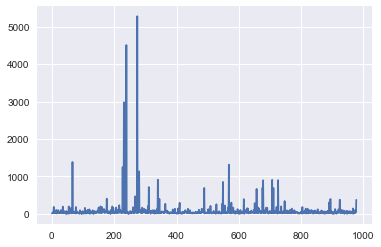

In [199]:
sns.plt.plot(mut_tot)

# Silent vs IGR (m1 vs m2)

array([[ 1.        ,  0.27790547],
       [ 0.27790547,  1.        ]])

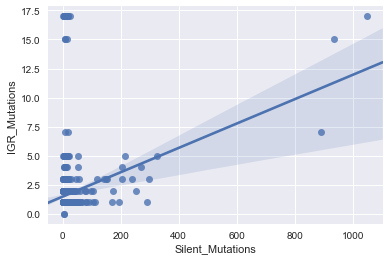

In [238]:
sns.regplot(medidas.Silent_Mutations, medidas.IGR_Mutations)
np.corrcoef(medidas.Silent_Mutations, medidas.IGR_Mutations)

# Silent vs Intron (m1 vs m3)

array([[ 1.        ,  0.47896509],
       [ 0.47896509,  1.        ]])

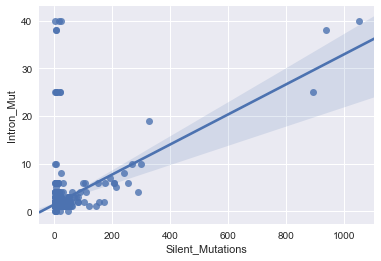

In [239]:
sns.regplot(medidas.Silent_Mutations,medidas.Intron_Mut)
np.corrcoef(medidas.Silent_Mutations,medidas.Intron_Mut)

# IGR vs Intron (m2 vs m3)

array([[ 1.     ,  0.49151],
       [ 0.49151,  1.     ]])

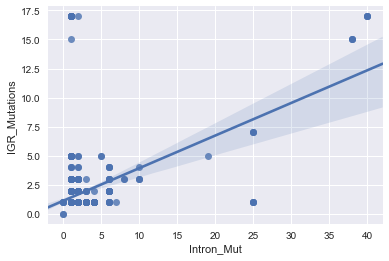

In [250]:
sns.regplot(medidas.Intron_Mut, medidas.IGR_Mutations)
np.corrcoef(medidas.Intron_Mut, medidas.IGR_Mutations)

# Mutaciones totales vs. Suma silent, IGR, Intron

array([[ 1.        ,  0.97839933],
       [ 0.97839933,  1.        ]])

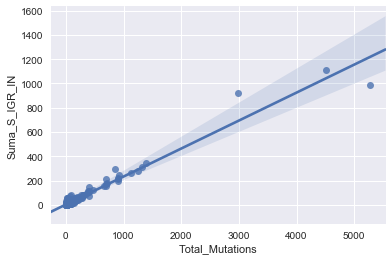

In [236]:
sns.regplot(medidas.Total_Mutations, medidas.Suma_S_IGR_IN)
np.corrcoef(medidas.Total_Mutations, medidas.Suma_S_IGR_IN)

# Silent vs Low+Neutral FI
FI = Functional Impact

array([[ 1.       ,  0.9694933],
       [ 0.9694933,  1.       ]])

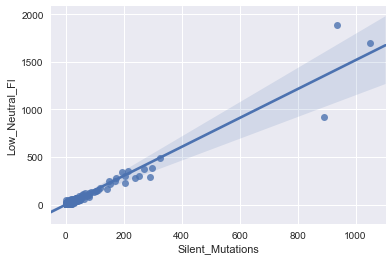

In [241]:
sns.regplot(medidas.Silent_Mutations, medidas.Low_Neutral_FI)
np.corrcoef(medidas.Silent_Mutations, medidas.Low_Neutral_FI)

# Intergenic vs Low+Neutral FI

array([[ 1.        ,  0.29476121],
       [ 0.29476121,  1.        ]])

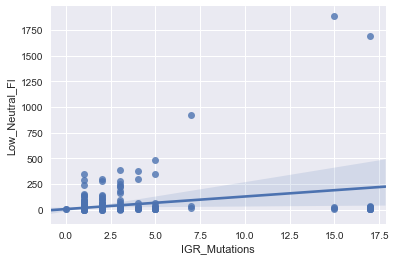

In [242]:
sns.regplot(medidas.IGR_Mutations, medidas.Low_Neutral_FI)
np.corrcoef(medidas.IGR_Mutations, medidas.Low_Neutral_FI)

# Introns vs Low+Neutral FI

array([[ 1.        ,  0.48870696],
       [ 0.48870696,  1.        ]])

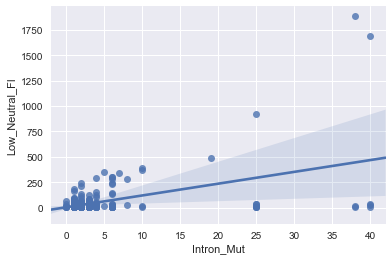

In [243]:
sns.regplot(medidas.Intron_Mut, medidas.Low_Neutral_FI)
np.corrcoef(medidas.Intron_Mut, medidas.Low_Neutral_FI)

# Suma vs Low+Neutral

array([[ 1.        ,  0.96908146],
       [ 0.96908146,  1.        ]])

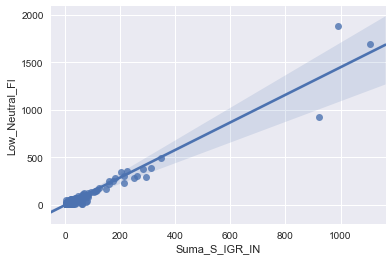

In [245]:
sns.regplot(medidas.Suma_S_IGR_IN, medidas.Low_Neutral_FI)
np.corrcoef(medidas.Suma_S_IGR_IN, medidas.Low_Neutral_FI)